In [29]:
# Install RDKit: https://www.rdkit.org/docs/Install.html
# Install NetworkX: pip install networkx

import networkx as nx
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.GraphDescriptors import BertzCT
import pandas as pd
import numpy as np


def molecular_weight(mol):
    """
    Calculates the molecular weight of a molecule.
    
    Molecular weight is the sum of the atomic weights of all the atoms in a molecule. It is a simple
    measure of the molecule's size and is often used to estimate properties like solubility and boiling point.
    
    :param mol: An RDKit molecule object.
    :return: The molecular weight.
    """
    return Descriptors.MolWt(mol)

def bertz_complexity(mol):
    """
    Calculates the Bertz complexity of a molecule.
    
    Bertz complexity is a topological index that combines both bond and atom information. It is a measure
    of the structural complexity of the molecule and is used to compare the complexity of different molecules.
    
    :param mol: An RDKit molecule object.
    :return: The Bertz complexity.
    """
    return BertzCT(mol)

def wiener_index(mol):
    """
    Calculates the Wiener index of a molecule.
    
    Wiener index is a topological descriptor calculated as the sum of the shortest path lengths between
    all pairs of atoms in a molecule. It is a measure of the molecule's branching and can be used to estimate
    various physicochemical properties.
    
    :param mol: An RDKit molecule object.
    :return: The Wiener index.
    """
    distance_matrix = Chem.rdmolops.GetDistanceMatrix(mol)
    G = nx.Graph()

    # Add nodes
    for i in range(len(distance_matrix)):
        G.add_node(i)

    # Add edges
    for i in range(len(distance_matrix)):
        for j in range(i + 1, len(distance_matrix)):
            G.add_edge(i, j, weight=distance_matrix[i, j])

    return nx.wiener_index(G)

def balaban_index(mol):
    """
    Calculates the Balaban index of a molecule.
    
    Balaban index is a topological descriptor that quantifies the degree of branching in a molecule.
    It is useful for predicting physicochemical properties and biological activities of molecules.
    
    :param mol: An RDKit molecule object.
    :return: The Balaban index.
    """
    return Descriptors.BalabanJ(mol)

def randic_index(mol):
    """
    Calculates the Randic index of a molecule.
    
    Randic index is a topological descriptor calculated by summing the inverse square roots of the
    product of the degrees of connected atom pairs. It is used for the study of molecular structure-activity
    relationships and the prediction of physicochemical properties.
    
    :param mol: An RDKit molecule object.
    :return: The Randic index.
    """
    G = Chem.rdmolops.GetAdjacencyMatrix(mol)
    degrees = [sum(row) for row in G]
    randic_sum = 0
    for i, row in enumerate(G):
        for j, val in enumerate(row):
            if val == 1:
                randic_sum += 1 / (degrees[i] * degrees[j]) ** 0.5
    return randic_sum / 2


def kirchhoff_index(mol):
    """
    Calculates the Kirchhoff index of a molecule.
    
    Kirchhoff index is a topological index calculated as the sum of the effective resistances between
    all pairs of vertices in the molecular graph. It is used for predicting physicochemical properties
    and molecular activities.
    
    :param mol: An RDKit molecule object.
    :return: The Kirchhoff index.
    """
    adjacency_matrix = Chem.rdmolops.GetAdjacencyMatrix(mol).astype(np.float64)
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    laplacian_matrix = degree_matrix - adjacency_matrix
    pseudo_inverse_laplacian = np.linalg.pinv(laplacian_matrix)
    diagonal_elements = np.diagonal(pseudo_inverse_laplacian)

    kirchhoff_sum = 0
    for i in range(len(diagonal_elements)):
        for j in range(i + 1, len(diagonal_elements)):
            kirchhoff_sum += (diagonal_elements[i] + diagonal_elements[j] - 2 * pseudo_inverse_laplacian[i, j])

    return kirchhoff_sum


# Example usage:
smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
mol = Chem.MolFromSmiles(smiles)

print("Molecular weight:", molecular_weight(mol))
print("Wiener index:", wiener_index(mol))
print("Balaban index:", balaban_index(mol))
print("Randic index:", randic_index(mol))
print("Bertz complexity:", bertz_complexity(mol))
print("kirchhoff index:", kirchhoff_index(mol))


Molecular weight: 180.15899999999996
Wiener index: 78.0
Balaban index: 3.0435273546341013
Randic index: 6.109060905280624
Bertz complexity: 343.2228677267164
kirchhoff index: 212.33333333333331


In [8]:
kegg_compounds = pd.read_csv("../assets/kegg_cpds.smiles.tsv",sep=",")
kegg_compounds = kegg_compounds.dropna()

In [30]:
df = {"cid":[],"mol_weight":[],"bertz":[],"weiner":[],"balaban":[],"randic":[],"kirchhoff":[]}
for idx,row in kegg_compounds.iterrows():
    mol = Chem.MolFromSmiles(row.smiles)
    try:
        mol_weight = molecular_weight(mol)
    except:
        mol_weight = None
    try:   
        weiner = wiener_index(mol)
    except:
        weiner = None
    try:
        balaban = balaban_index(mol)
    except:
        balaban = None
    try:
        randic = randic_index(mol)
    except:
        randic = None
    try:
        bertz = bertz_complexity(mol)
    except:
        bertz = None
        
    try:
        kirchhoff = kirchhoff_index(mol)
    except:
        kirchhoff = None

    df["cid"].append(row.cid)
    df["mol_weight"].append(mol_weight)
    df["bertz"].append(bertz)
    df["weiner"].append(weiner)
    df["balaban"].append(balaban)
    df["randic"].append(randic)
    df["kirchhoff"].append(kirchhoff)
    
df = pd.DataFrame(df)
df.to_csv("../assets/kegg_compound_complexity_metrics.csv")

[21:04:03] WARNING: not removing hydrogen atom without neighbors
[21:04:04] Explicit valence for atom # 0 O, 4, is greater than permitted
[21:04:07] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:04:13] Explicit valence for atom # 21 N, 5, is greater than permitted
[21:04:19] Explicit valence for atom # 23 C, 5, is greater than permitted
[21:04:21] Explicit valence for atom # 6 N, 4, is greater than permitted
[21:04:41] Explicit valence for atom # 18 N, 4, is greater than permitted
[21:04:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:05:06] Explicit valence for atom # 0 C, 5, is greater than permitted
[21:05:07] Explicit valence for atom # 0 C, 5, is greater than permitted
[21:05:08] Explicit valence for atom # 12 C, 5, is greater than permitted
[21:05:11] Explicit valence for atom # 31 N, 4, is greater than permitted
[21:05:12] Explicit valence for atom # 26 C, 5, is greater than permitted
[21:05:13] Explicit valence for atom # 36 N, 4, is gr

In [24]:
import seaborn as sns

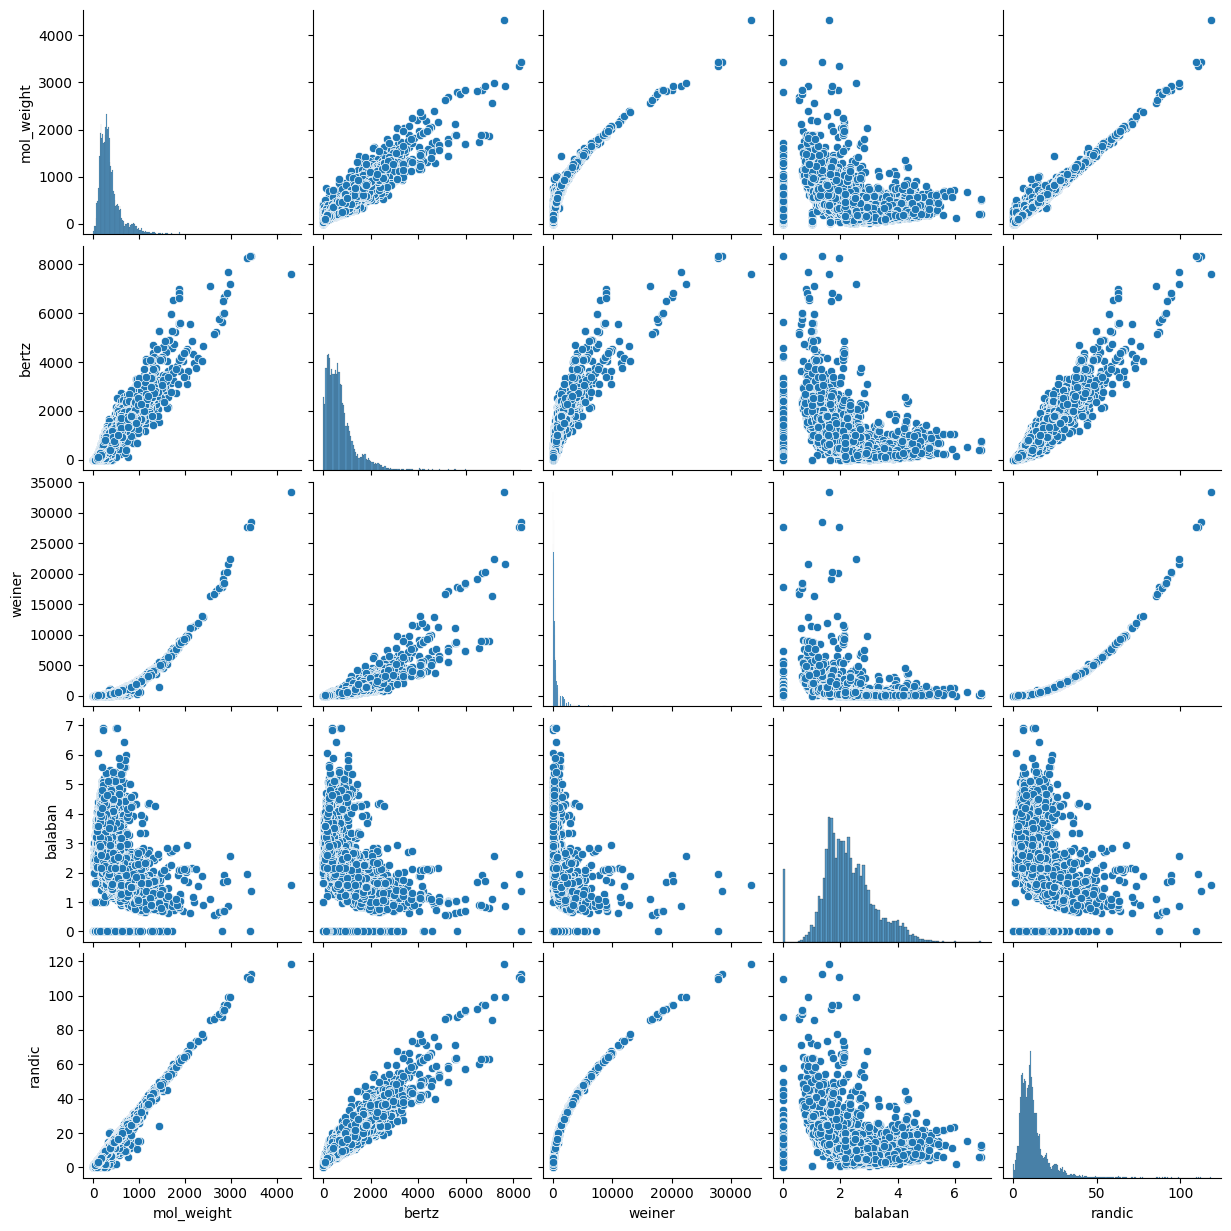

In [26]:
sns.pairplot(df.set_index("cid"))